In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
import re

# from xgboost import XGBClassifier

files = os.listdir("./input")
print(files)

['df_test_cleaned.csv', 'df_test_dummy.csv', 'df_test_labelencoded.csv', 'df_test_onehot.csv', 'df_train_cleaned.csv', 'df_train_dummy.csv', 'df_train_labelencoded.csv', 'df_train_onehot.csv', 'raw']


In [2]:
df_train = pd.read_csv('./input/df_train_cleaned.csv')
df_test = pd.read_csv('./input/df_test_cleaned.csv')

df_train_oh = pd.read_csv('./input/df_train_onehot.csv')
df_test_oh = pd.read_csv('./input/df_test_onehot.csv')

df_train_label = pd.read_csv('./input/df_train_labelencoded.csv')
df_test_label = pd.read_csv('./input/df_test_labelencoded.csv')

In [3]:
print("df_train.shape", df_train.shape)
df_train.head()

df_train.shape (891, 9)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,0,3,male,22.0,7.2500,S,Mr,2,0
1,1,1,female,38.0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,7.9250,S,Miss,1,1
3,1,1,female,35.0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,8.0500,S,Mr,1,1


In [4]:
print("df_test.shape", df_test.shape)
df_test.head()

df_test.shape (418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,male,34.5,7.8292,Q,Mr,1,1
1,3,female,47.0,7.0000,S,Mrs,2,0
2,2,male,62.0,9.6875,Q,Mr,1,1
3,3,male,27.0,8.6625,S,Mr,1,1
4,3,female,22.0,12.2875,S,Mrs,3,0


In [5]:
print("df_train_oh.shape", df_train_oh.shape)
df_train_oh.head()

df_train_oh.shape (891, 17)


,Survived,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0,0
1,1,1,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0,0
3,1,1,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1,0
4,0,3,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0,0


In [6]:
print("df_test_oh.shape", df_test_oh.shape)
df_test_oh.head()

df_test_oh.shape (418, 16)


,Pclass,Age,Fare,Family_size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,1,1,0,1,0,1,0,0,0,0,1,0,0
1,3,47.0,7.0000,2,0,1,0,0,0,1,0,0,0,0,1,0
2,2,62.0,9.6875,1,1,0,1,0,1,0,0,0,0,1,0,0
3,3,27.0,8.6625,1,1,0,1,0,0,1,0,0,0,1,0,0
4,3,22.0,12.2875,3,0,1,0,0,0,1,0,0,0,0,1,0


In [7]:
print("df_train_label.shape", df_train_label.shape)
df_train_label.head()

df_train_label.shape (891, 9)


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,0,3,1,22.0,7.2500,2,3,2,0
1,1,1,0,38.0,71.2833,0,4,2,0
2,1,3,0,26.0,7.9250,2,2,1,1
3,1,1,0,35.0,53.1000,2,4,2,0
4,0,3,1,35.0,8.0500,2,3,1,1


In [8]:
print("df_test_label.shape", df_test_label.shape)
df_test_label.head()

df_test_label.shape (418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,1,34.5,7.8292,1,2,1,1
1,3,0,47.0,7.0000,2,3,2,0
2,2,1,62.0,9.6875,1,2,1,1
3,3,1,27.0,8.6625,2,2,1,1
4,3,0,22.0,12.2875,2,3,3,0


## Use df_train_oh / df_train_label
    df_train_oh -> x_train, y_train
    (x_dev & y_dev will split from  x_train, y_train in Keras Modelling, validation_split = 0.2)
    
    x_test = df_test_oh (x_test is for prediction, no y_test)

In [9]:
x_train = df_train_label.drop('Survived', axis=1)

print("x_train.shape:", x_train.shape)
x_train.head()

x_train.shape: (891, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,1,22.0,7.2500,2,3,2,0
1,1,0,38.0,71.2833,0,4,2,0
2,3,0,26.0,7.9250,2,2,1,1
3,1,0,35.0,53.1000,2,4,2,0
4,3,1,35.0,8.0500,2,3,1,1


In [10]:
y_train = pd.DataFrame(df_train_label['Survived'])

print("y_train.shape:", y_train.shape)
y_train.head()

y_train.shape: (891, 1)


,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x_test = df_test_label

print("x_test.shape:", x_test.shape)
x_test.head()

x_test.shape: (418, 8)


,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,1,34.5,7.8292,1,2,1,1
1,3,0,47.0,7.0000,2,3,2,0
2,2,1,62.0,9.6875,1,2,1,1
3,3,1,27.0,8.6625,2,2,1,1
4,3,0,22.0,12.2875,2,3,3,0


## Normalization

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
x_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,3,1,22.0,7.2500,2,3,2,0
1,1,0,38.0,71.2833,0,4,2,0
2,3,0,26.0,7.9250,2,2,1,1
3,1,0,35.0,53.1000,2,4,2,0
4,3,1,35.0,8.0500,2,3,1,1


In [14]:
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index = x_test.index, columns = x_test.columns)   #transform only for testset
x_train_scaled.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,1.0,1.0,0.271174,0.014151,1.0,0.6,0.1,0.0
1,0.0,0.0,0.472229,0.139136,0.0,0.8,0.1,0.0
2,1.0,0.0,0.321438,0.015469,1.0,0.4,0.0,1.0
3,0.0,0.0,0.434531,0.103644,1.0,0.8,0.1,0.0
4,1.0,1.0,0.434531,0.015713,1.0,0.6,0.0,1.0


In [15]:
scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), index = x_train.index, columns = x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), index = x_test.index, columns = x_test.columns)
x_train_scaled.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Family_size,IsAlone
0,0.827377,0.737695,-0.565736,-0.502445,0.585954,0.162149,0.059160,-1.231645
1,-1.566107,-1.355574,0.663861,0.786845,-1.942303,1.386510,0.059160,-1.231645
2,0.827377,-1.355574,-0.258337,-0.488854,0.585954,-1.062212,-0.560975,0.811922
3,-1.566107,-1.355574,0.433312,0.420730,0.585954,1.386510,0.059160,-1.231645
4,0.827377,0.737695,0.433312,-0.486337,0.585954,0.162149,-0.560975,0.811922


## Modelling (Keras)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


In [17]:
def Model (input_shape):
    
    model = Sequential()
    model.add(Dense(30, activation='relu', input_dim=input_shape, kernel_initializer='uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(20, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    return model

In [18]:
model = Model(x_train_scaled.shape[1])
model.summary()

W0822 15:23:01.604910  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 15:23:01.977282  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 15:23:02.102953  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 15:23:02.181276  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0822 15:23:02.195239  2688 de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                270       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total para

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0822 15:23:03.805932  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0822 15:23:03.928603  2688 deprecation_wrapper.py:119] From D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 15:23:03.936582  2688 deprecation.py:323] From D:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
history = model.fit(x = x_train_scaled, y = y_train, epochs = 50, batch_size = 30, validation_split = 0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/50
712/712 [==============================] - 1s 2ms/step - loss: 0.6923 - acc: 0.5815 - val_loss: 0.6900 - val_acc: 0.6425
Epoch 2/50
712/712 [==============================] - 0s 56us/step - loss: 0.6884 - acc: 0.6096 - val_loss: 0.6816 - val_acc: 0.6425
Epoch 3/50
712/712 [==============================] - 0s 63us/step - loss: 0.6760 - acc: 0.6096 - val_loss: 0.6510 - val_acc: 0.6425
Epoch 4/50
712/712 [==============================] - 0s 60us/step - loss: 0.6398 - acc: 0.6096 - val_loss: 0.5657 - val_acc: 0.6425
Epoch 5/50
712/712 [==============================] - 0s 60us/step - loss: 0.5752 - acc: 0.6096 - val_loss: 0.4987 - val_acc: 0.6425
Epoch 6/50
712/712 [==============================] - 0s 66us/step - loss: 0.5930 - acc: 0.6166 - val_loss: 0.4947 - val_acc: 0.6425
Epoch 7/50
712/712 [==============================] - 0s 64us/step - loss: 0.5615 - acc: 0.6728 - val_loss: 0.4840 - val_acc: 0.7933
Epoch 8/50
712/712 [====

In [21]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## Model Evaluation (df_train)

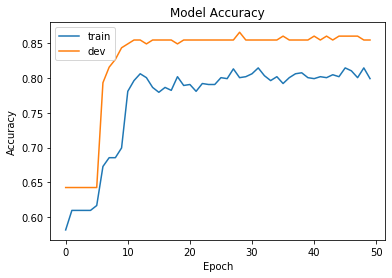

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

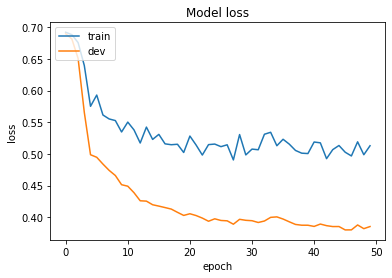

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

In [24]:
score = model.evaluate(x_train_scaled, y_train, batch_size=30)
print("loss:", score[0])
print("metric (accuracy): ", score[1])

891/891 [==============================] - 0s 29us/step
loss: 0.43391050543849313
metric (accuracy):  0.8282828234662913


## Prediction (df_test)

In [28]:
y_preds = model.predict(x_test)

submission = pd.read_csv("./input/raw/gender_submission.csv", index_col='PassengerId')
submission['Survived'] = y_preds.astype(int)
submission.to_csv('./output/submission_titanic.csv')

## Plot Model png

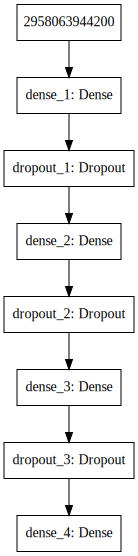

In [29]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file='./output/model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

**GRAFICOS**

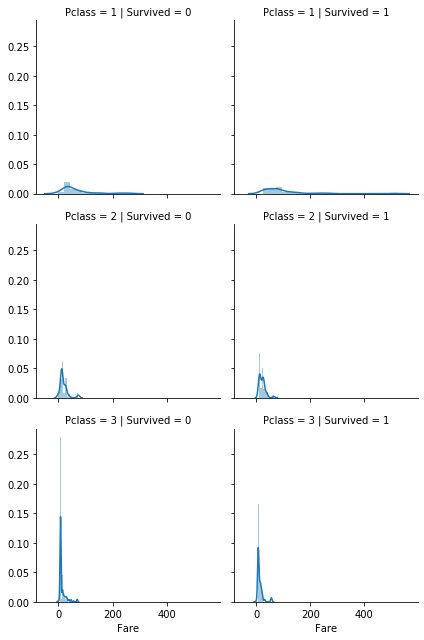

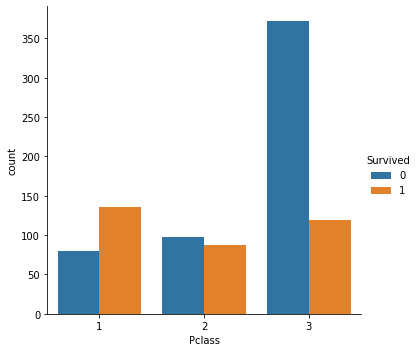

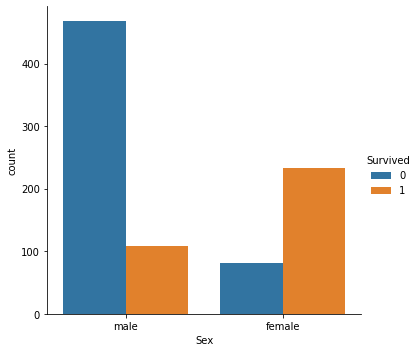

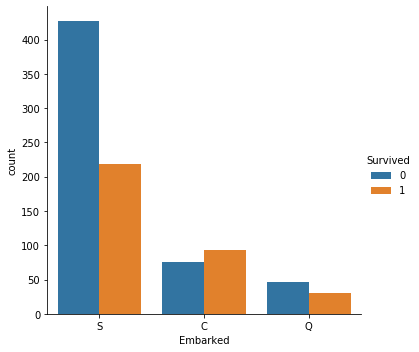

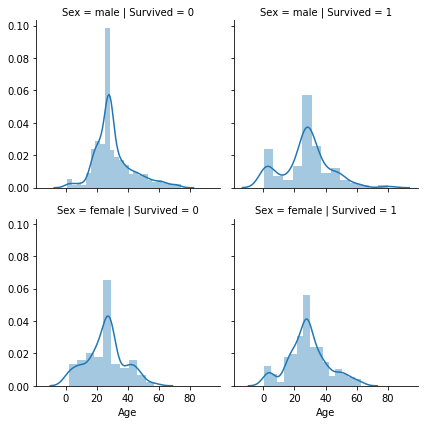

In [30]:
sns.FacetGrid(df_train, col='Survived',row='Pclass').map(sns.distplot,'Fare')
"""
sns.catplot("Family_Numerous", data=df_train, aspect=2.0, kind='count',
                       hue='Survived')
"""
sns.catplot("Pclass", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.catplot("Sex", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.catplot("Embarked", data=df_train, aspect=1.0, kind='count',
                       hue='Survived')

sns.FacetGrid(df_train, col='Survived',row='Sex').map(sns.distplot,'Age')

df_surv_male = []


**SAVING THE SUBMISSION TO CSV**